Figures 1A,B in Mahdavi et al. (2021) Environmental Pollution

These figures illustrate weekly-integrated PM and trace metal concentrations in the studied home.

Plot type: Bar plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

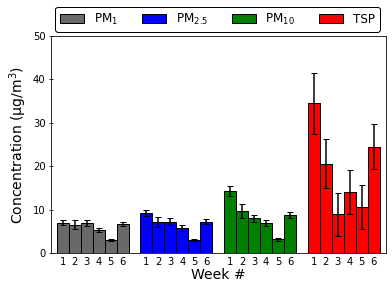

In [2]:
#################
### Figure 1A ###
#################

df = pd.read_excel(backslash_correct(r'C:\PhD Research\Airborne\Processed\pm_master_all.xlsx'))
df.columns

df_value = df[['visit', 'PM1 SCI', 'PM2.5 SCI', 'PM10 SCI', 'TSP Concentration']].set_index('visit')
df_error = df[['visit', 'PM1 SCI Error', 'PM2.5 SCI Error', 'PM10 SCI Error', 'TSP Concentration Error']].set_index('visit')

value_name = dict(zip(df_value.columns,range(4)))
error_name = dict(zip(df_error.columns,range(4)))

df_value.rename(columns = value_name, inplace = True)
df_error.rename(columns = error_name, inplace = True)

df_value = df_value.unstack()
df_error = df_error.unstack()

df = pd.concat([df_value, df_error], axis = 1)
counter = pd.Series(df.index.get_level_values(0)*(6+1) + df.index.get_level_values(1))

df = df.reset_index()
# df = pd.join(df, counter, left_index = True, right_index = True)
# df = df.join(counter)
df = pd.concat([df, counter], axis=1)

df.columns = ['PM index', 'visit', 'value', 'error', 'counter']

color_code = {0:'dimgrey',
              1:'b',
              2:'g',
              3:'r'}

pm_code = {0:'PM$_{1}$',
              1:'PM$_{2.5}$',
              2:'PM$_{10}$',
              3:'TSP'}


plt.figure()

for p in df['PM index'].unique():
    plt.bar(df[df['PM index'] == p]['counter'],df[df['PM index'] == p]['value'], 
            color = color_code[p], width = 1, edgecolor = 'k', label = pm_code[p],
            yerr = (df[df['PM index'] == p]['error'], df[df['PM index'] == p]['error']),
            ecolor = 'k', capsize = 3)

plt.xticks([])
plt.xlim(0,28)

j = 0
for i in df['counter'].unique():
    plt.text(i, -2, str(df.loc[j,'visit']), fontsize = 10, ha = 'center', va = 'center')
    j += 1
plt.text(14, -5, 'Week #', fontsize = 14, ha = 'center', va = 'center')

plt.ylim(0,50)
plt.yticks(np.arange(0, 51, step = 10))
plt.ylabel('Concentration (µg/m$^{3}$)', size = 14)
plt.tick_params(axis = 'y', direction = 'inout')
plt.legend(bbox_to_anchor=(1, 1.16), ncol = 4, fontsize = 12, frameon = True, edgecolor = 'black', framealpha=1)

plt.savefig(r'C:/Career/Learning/Python Practice/Stata_Python_Booster/PhD - QFF/Processed/plots/Figure1A.jpg', format='jpg', dpi=1600, bbox_inches='tight')


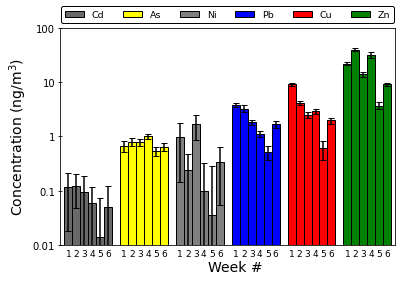

In [3]:
#################
### Figure 1B ###
#################

elem_dict_label = {'Cd': 0,
                   'As': 1, 
                   'Ni': 2,  
                   'Pb': 3,  
                   'Cu': 4,  
                   'Zn': 5}

elem_label2 = dict((v, k) for k, v in elem_dict_label.items())

color_elem_code = {0:'dimgrey',
                   1:'yellow',
                   2:'grey',
                   3:'b',
                   4: 'r', 
                   5: 'g'}

elem_list = stata_varlist_split('Pb As Cd Cu Zn Ni K Ti V Fe Sr Sb')
select_list = stata_varlist_split('Pb As Cd Cu Zn Ni')
df = pd.read_excel(backslash_correct(r'C:\Career\Learning\Python Practice\Stata_Python_Booster\PhD - QFF\Processed\tm_concentration_master.xlsx'))

df_value = df[['visit'] + select_list].set_index('visit').unstack(level = 1)
df_error = df[['visit'] + [col + '_error' for col in select_list]].set_index('visit').unstack(level = 1)


a = df_value.reset_index().rename(columns = {'level_0':'Element', 
                                             0: 'Concentration'})

b = df_error.reset_index().rename(columns = {0: 'Error'})['Error']

df = pd.concat([a,b], axis = 1)
df.replace({'Element': elem_dict_label}, inplace = True)
df.sort_values(['Element', 'visit'], inplace = True)
df['counter'] = df['visit'] +  (df['Element']) * (6+1)

plt.figure()
for e in df['Element'].unique():
    plt.bar(df[df['Element'] == e]['counter'],df[df['Element'] == e]['Concentration'], 
            color = color_elem_code[e], width = 1, edgecolor = 'k', label = elem_label2[e],
            yerr = (df[df['Element'] == e]['Error'], df[df['Element'] == e]['Error']),
            ecolor = 'k', capsize = 3)

plt.xticks([])
plt.xlim(0,42)

plt.yscale('log')
plt.ylim(0.01,100)
a = [0.01, 0.1, 1, 10, 100]
plt.yticks(ticks = a, labels = a)
plt.ylabel('Concentration (ng/m$^{3}$)', size = 14)

plt.minorticks_off()

j = 0
for i in df['counter'].unique():
    plt.text(i, 0.007, str(df.loc[j,'visit']), fontsize = 9, ha = 'center', va = 'center')
    j += 1
plt.text(22, 0.004, 'Week #', fontsize = 14, ha = 'center', va = 'center')
plt.tick_params(axis = 'y', direction = 'inout')
plt.legend(bbox_to_anchor=(1.01, 1.12), ncol = 6, fontsize = 9.5, frameon = True, edgecolor = 'black', framealpha=1)

plt.savefig(r'C:/Career/Learning/Python Practice/Stata_Python_Booster/PhD - QFF/Processed/plots/Figure1B.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code